# Caricamento dataset e analisi esplorativa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,BatchNormalization,Add,Input
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Numero di esempi di train: 60000
Numero esempi di test: 10000
Dimensione immagini: (28, 28)
Numero di classi: 10


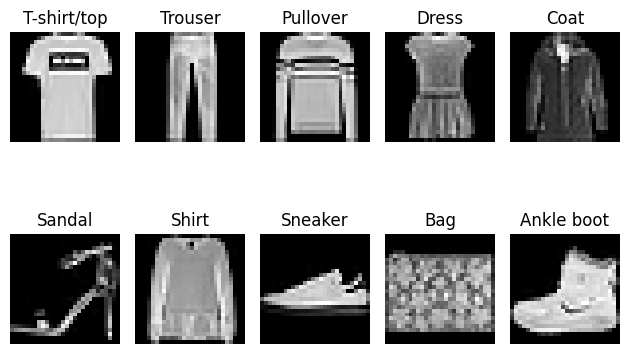

In [2]:
print("Numero di esempi di train:",len(train_images))
print("Numero esempi di test:",len(test_images))
print("Dimensione immagini:",train_images[0].shape)
print("Numero di classi:",len(np.unique(train_labels)))

clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

fig, axes = plt.subplots(2, 5)  # Crea una griglia 2x5

for i, ax in enumerate(axes.flatten()):
    index = np.where(train_labels == i)[0][0]
    img = train_images[index]
    cloths = train_labels[index]
    ax.axis("off")
    ax.imshow(img, cmap="gray")
    ax.set_title(clothing[cloths])

plt.tight_layout()
plt.show()

train_images=train_images.reshape(train_images.shape[0],train_images.shape[1],train_images.shape[2],1)
test_images=test_images.reshape(test_images.shape[0],test_images.shape[1],test_images.shape[2],1)

train_labels_cat=to_categorical(train_labels)

[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]


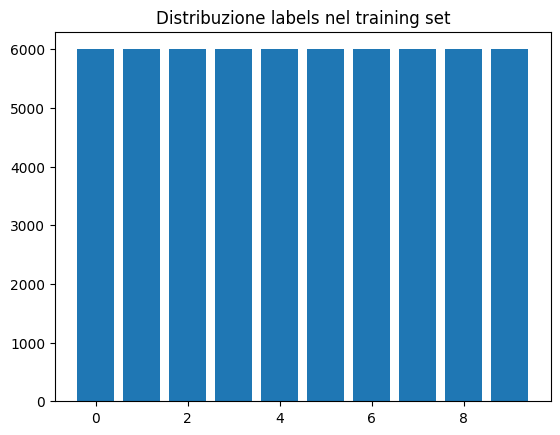

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


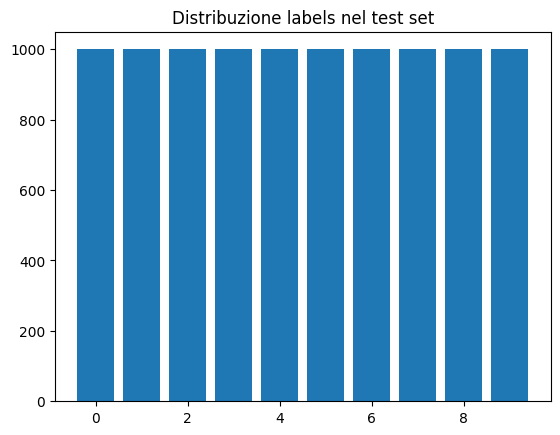

In [3]:
samples_dist=[]
classes=range(0,10,1)

for c in np.unique(train_labels):
  n=np.count_nonzero(train_labels==c)
  samples_dist.append(n)

print(samples_dist)

plt.figure()
plt.title("Distribuzione labels nel training set")
plt.bar(classes,samples_dist)
plt.show()

samples_dist1=[]
classes=range(0,10,1)

for c in np.unique(test_labels):
  n=np.count_nonzero(test_labels==c)
  samples_dist1.append(n)

print(samples_dist1)

plt.figure()
plt.title("Distribuzione labels nel test set")
plt.bar(classes,samples_dist1)
plt.show()

# Prima rete

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 128)               2

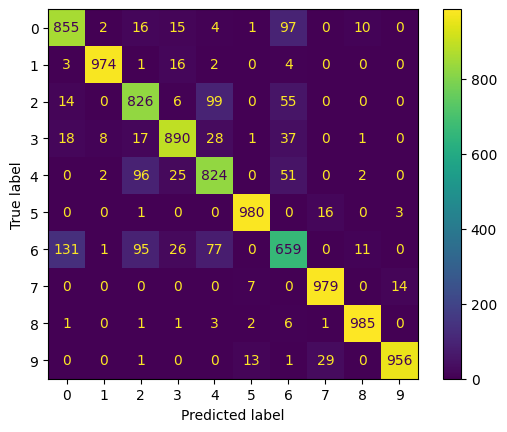

In [4]:
cnn1= Sequential()
cnn1.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn1.add(MaxPooling2D(pool_size=(2,2), strides=1))
cnn1.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2,2), strides=1))
cnn1.add(Flatten())
cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dropout(0.5))
cnn1.add(Dense(10, activation='softmax'))

print(cnn1.summary())

opt=Adam(learning_rate=1e-3)
loss_fn=CategoricalCrossentropy()
cnn1.compile(optimizer=opt,loss=loss_fn)
history=cnn1.fit(train_images,train_labels_cat,batch_size=64,validation_split=0.2,epochs=50)

val_losses1=history.history["val_loss"]
train_losses1=history.history["loss"]

proba=cnn1.predict(test_images)
y_pred=np.argmax(proba,axis=-1)
a_cnn1=accuracy_score(test_labels,y_pred)
f1_cnn1=f1_score(test_labels,y_pred,average="weighted")
print("Accuracy:",a_cnn1)
print("F1-Score:",f1_cnn1)

cm=confusion_matrix(test_labels,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

# Seconda rete

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 32)        25632     
                                                      

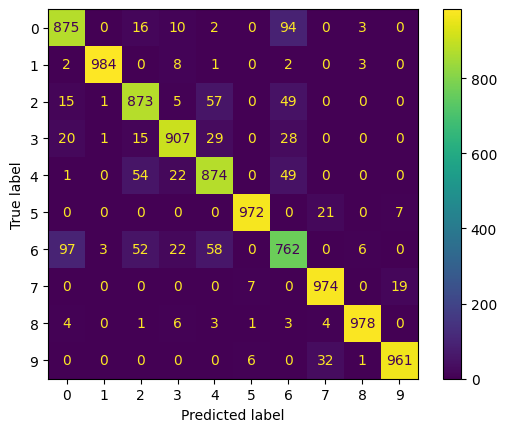

In [5]:
cnn2= Sequential()
cnn2.add(BatchNormalization(input_shape=(28, 28, 1))) #axis=-1,momentum=0.99,epsilon=0.001
cnn2.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2), strides=1))
cnn2.add(BatchNormalization())
cnn2.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2), strides=1))
cnn2.add(Flatten())
cnn2.add(Dense(128, activation='relu'))
cnn2.add(Dropout(0.5))
cnn2.add(Dense(10, activation='softmax'))

print(cnn2.summary())

opt=Adam(learning_rate=1e-3)
loss_fn=CategoricalCrossentropy()
cnn2.compile(optimizer=opt,loss=loss_fn)
history=cnn2.fit(train_images,train_labels_cat,batch_size=64,validation_split=0.2,epochs=50)

val_losses2=history.history["val_loss"]
train_losses2=history.history["loss"]

proba=cnn2.predict(test_images)
y_pred=np.argmax(proba,axis=-1)
a_cnn2=accuracy_score(test_labels,y_pred)
f1_cnn2=f1_score(test_labels,y_pred,average="weighted")
print("Accuracy:",a_cnn2)
print("F1-Score:",f1_cnn2)

cm=confusion_matrix(test_labels,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

# Terza rete

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 28, 28, 1)   4           ['input_1[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 conv2d_4 (Conv2D)              (None, 28, 28, 32)   832         ['batch_normalization_2[0][0]']  
                                                                                                  
 add (Add)                      (None, 28, 28, 32)   0           ['conv2d_4[0][0]',           

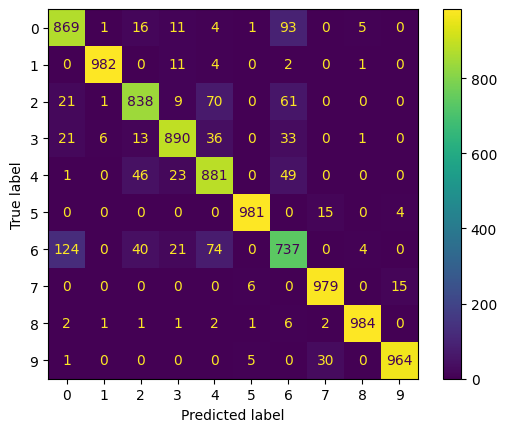

In [6]:
inputs = Input(shape=(28, 28, 1))
x = BatchNormalization()(inputs)
x1 = Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu')(x)
x2 = Add()([x1, x])
x3 = MaxPooling2D(strides=2)(x2)
x4 = BatchNormalization()(x3)
x5 = Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu')(x4)
x6 = Add()([x5, x4])
x7 = MaxPooling2D(strides=2)(x6)
x8 = Flatten()(x7)
x9 = Dense(128, activation='relu')(x8)
x10 = Dropout(0.5)(x9)
outputs = Dense(10, activation='softmax')(x10)

# Create the model
cnn3 = Model(inputs=inputs, outputs=outputs)

print(cnn3.summary())

opt = Adam(learning_rate=1e-3)
loss_fn = CategoricalCrossentropy()
cnn3.compile(optimizer=opt, loss=loss_fn)
np.random.seed(42)
history = cnn3.fit(train_images, train_labels_cat, batch_size=64, validation_split=0.2, epochs=50)

val_losses3=history.history["val_loss"]
train_losses3=history.history["loss"]

proba=cnn3.predict(test_images)
y_pred=np.argmax(proba,axis=-1)
a_cnn3=accuracy_score(test_labels,y_pred)
f1_cnn3=f1_score(test_labels,y_pred,average="weighted")
print("Accuracy:",a_cnn3)
print("F1-Score:",f1_cnn3)

cm=confusion_matrix(test_labels,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

# Confronto

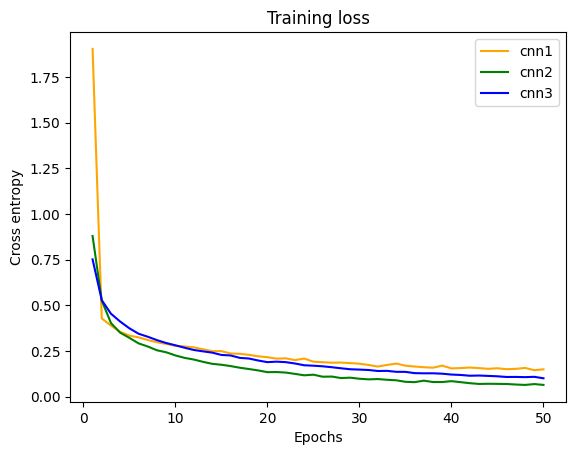

In [7]:
epochs = range(1, len(val_losses1) + 1)

plt.figure()
plt.title("Training loss")
plt.plot(epochs,train_losses1,c="orange",label="cnn1")
plt.plot(epochs,train_losses2,c="green",label="cnn2")
plt.plot(epochs,train_losses3,c="blue",label="cnn3")
plt.xlabel("Epochs")
plt.ylabel("Cross entropy")
plt.legend()

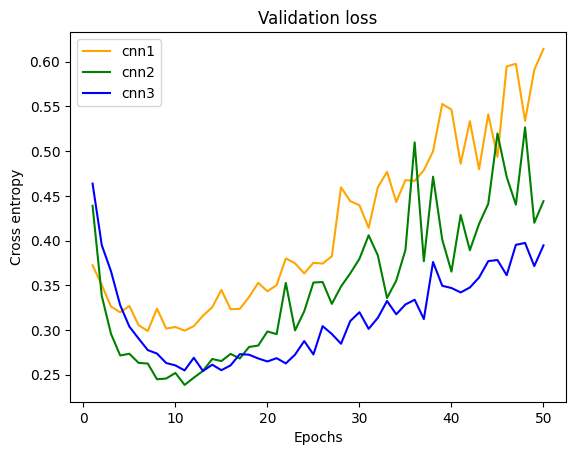

In [8]:
plt.figure()
plt.title("Validation loss")
plt.plot(epochs,val_losses1,c="orange",label="cnn1")
plt.plot(epochs,val_losses2,c="green",label="cnn2")
plt.plot(epochs,val_losses3,c="blue",label="cnn3")
plt.xlabel("Epochs")
plt.ylabel("Cross entropy")
plt.legend()

# CNN + BatchNorm
epochs = 10
batch_size = 65, 128
validation_split = 0.2, 0.1

In [11]:
val_losses2.index(min(val_losses2))

10

In [12]:
history=cnn2.fit(train_images,train_labels_cat,batch_size=64,validation_split=0.2,epochs=10)

proba=cnn2.predict(test_images)
y_pred1=np.argmax(proba,axis=-1)
a_cnn2es=accuracy_score(test_labels,y_pred1)
f1_cnn2es=f1_score(test_labels,y_pred1,average="weighted")
print("Accuracy:",a_cnn2es)
print("F1-Score:",f1_cnn2es)

Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0660 - val_loss: 0.5099
Epoch 2/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0630 - val_loss: 0.4288
Epoch 3/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0644 - val_loss: 0.4748
Epoch 4/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0606 - val_loss: 0.5021
Epoch 5/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0589 - val_loss: 0.5881
Epoch 6/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0565 - val_loss: 0.5131
Epoch 7/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0589 - val_loss: 0.4900
Epoch 8/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0557 - val_loss: 0.6523
Epoch 9/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0605 - val_loss: 0.4815
Epoch 10/10
313/313 [==============================] - 1s 3ms/step
Accuracy: 0.9185
F1-Score: 0.9184

In [13]:
history=cnn2.fit(train_images,train_labels_cat,batch_size=64,validation_split=0.1,epochs=10)

proba=cnn2.predict(test_images)
y_pred2=np.argmax(proba,axis=-1)
a_cnn2es=accuracy_score(test_labels,y_pred2)
f1_cnn2es=f1_score(test_labels,y_pred2,average="weighted")
print("Accuracy:",a_cnn2es)
print("F1-Score:",f1_cnn2es)

Epoch 1/10
844/844 [==============================] - 8s 8ms/step - loss: 0.1166 - val_loss: 0.3775
Epoch 2/10
844/844 [==============================] - 5s 6ms/step - loss: 0.0915 - val_loss: 0.3860
Epoch 3/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0771 - val_loss: 0.3700
Epoch 4/10
844/844 [==============================] - 5s 6ms/step - loss: 0.0719 - val_loss: 0.3829
Epoch 5/10
844/844 [==============================] - 5s 6ms/step - loss: 0.0642 - val_loss: 0.3611
Epoch 6/10
844/844 [==============================] - 5s 6ms/step - loss: 0.0660 - val_loss: 0.5153
Epoch 7/10
844/844 [==============================] - 5s 7ms/step - loss: 0.0599 - val_loss: 0.4443
Epoch 8/10
844/844 [==============================] - 5s 6ms/step - loss: 0.0620 - val_loss: 0.4313
Epoch 9/10
844/844 [==============================] - 5s 6ms/step - loss: 0.0591 - val_loss: 0.4806
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9175
F1-Score: 0.9170

In [14]:
history=cnn2.fit(train_images,train_labels_cat,batch_size=128,validation_split=0.2,epochs=10)

proba=cnn2.predict(test_images)
y_pred3=np.argmax(proba,axis=-1)
a_cnn2es=accuracy_score(test_labels,y_pred3)
f1_cnn2es=f1_score(test_labels,y_pred3,average="weighted")
print("Accuracy:",a_cnn2es)
print("F1-Score:",f1_cnn2es)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0376 - val_loss: 0.2483
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0313 - val_loss: 0.2704
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0333 - val_loss: 0.2583
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0321 - val_loss: 0.3074
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0336 - val_loss: 0.3021
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0304 - val_loss: 0.3199
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0309 - val_loss: 0.3299
Epoch 8/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0346 - val_loss: 0.3360
Epoch 9/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0337 - val_loss: 0.3178
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9186
F1-Score: 0.91

In [15]:
history=cnn2.fit(train_images,train_labels_cat,batch_size=128,validation_split=0.1,epochs=10)

proba=cnn2.predict(test_images)
y_pred4=np.argmax(proba,axis=-1)
a_cnn2es=accuracy_score(test_labels,y_pred4)
f1_cnn2es=f1_score(test_labels,y_pred4,average="weighted")
print("Accuracy:",a_cnn2es)
print("F1-Score:",f1_cnn2es)

Epoch 1/10
422/422 [==============================] - 4s 10ms/step - loss: 0.0478 - val_loss: 0.4616
Epoch 2/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0425 - val_loss: 0.5236
Epoch 3/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0394 - val_loss: 0.5160
Epoch 4/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0387 - val_loss: 0.5559
Epoch 5/10
422/422 [==============================] - 4s 10ms/step - loss: 0.0379 - val_loss: 0.5741
Epoch 6/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0337 - val_loss: 0.5058
Epoch 7/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0381 - val_loss: 0.4695
Epoch 8/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0366 - val_loss: 0.6332
Epoch 9/10
422/422 [==============================] - 4s 8ms/step - loss: 0.0387 - val_loss: 0.4696
Epoch 10/10
313/313 [==============================] - 1s 3ms/step
Accuracy: 0.9224
F1-Score: 0.92

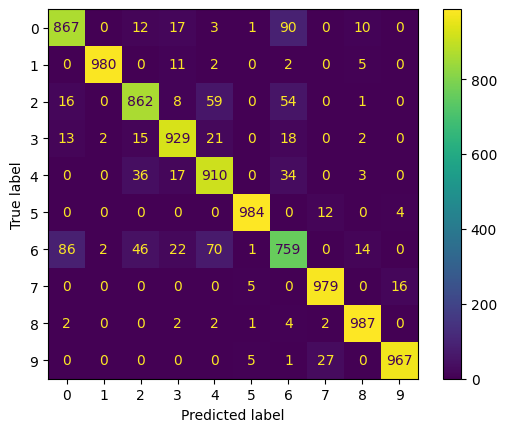

In [16]:
cm=confusion_matrix(test_labels,y_pred4)
disp=ConfusionMatrixDisplay(cm)
disp.plot()